<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/%5BHayan%5D_Kaggle_House_Price_v5(Final%2CStacking3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 파악
- 81개의 컬럼이 존재하고 있고, 그에 따른 데이터 전처리를 여러번 진행 예정

---

- colab ver

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# csv 파일 로드
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/test.csv")

---

---

- Kaggle 제출용

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/train.csv")
test = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/test.csv")

---

- train 데이터 확인

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1099.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,42.537671,574.708904,1060.175514,1161.748288,344.853596,5.094178,1511.696062,0.425514,0.058219,1.562500,0.388699,2.865582,1.047089,6.511130,0.625856,1978.404914,1.761130,469.888699,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,151.670697,440.959454,439.223929,392.662227,438.502580,44.876004,535.707765,0.518319,0.241463,0.551882,0.506624,0.824796,0.223722,1.639763,0.654232,24.988391,0.746517,213.604836,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,233.000000,793.000000,880.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,0.000000,485.500000,990.000000,1077.500000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.500000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,0.000000,813.250000,1306.000000,1392.500000,728.000000,0.000000,1774.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,1474.000000,2153.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- test 데이터 확인

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,565,Unf,0,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995.0,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0,1710,0,0,2,0,3,1,TA,9,Typ,0,NaN,Detchd,1990.0,Unf,2,480,TA,TA,Y,12,11,64,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,GasA,TA,Y,SBrkr,832,384,0,1216,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1947.0,Unf,1,336,TA,TA,Y,158,0,102,0,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml


<br>
<br>

### train 데이터에 집중하자
- 주요 컬럼은 뭐가 있을까? (Dataset Description 기반)
  - OverallQual: 주택의 전반적인 품질, 가격에 중요한 영향을 미침
  - GrLivArea: 지상 생활 공간 면적, 크기가 클수록 가격 상승에 영향이 있기 때문에 중요하다 생각
  - TotalBsmtSF: 지하실 면적, 주택의 전체 크기와 관련(외국의 경우, 지하실 유무에 따른 가격 차이가 심하게 나타남)
  - 1stFlrSF: 1층 면적, 주택의 크기와 연관
  - YearBuilt: 건축 연도, 오래된 집은 대체로 가격이 낮을 수 있음
  - Fireplaces: 벽난로 수(이 역시 외국의 경우 난방 시스템이 우리나라와 다르기 때문에 중요)

<br>
<br>

### 데이터에서 얻을 수 있는 인사이트
- 주택 가격이 위치, 면적, 방 개수, 상태 등등 많은 요소에 (상관계수에 따라 조금씩 다르겠지만) 영향을 받음
- 우리나라와 다른 주택의 형태로 인해 중요하게 생각하는 컬럼이 어쩌면 나라별로 다를 수 있겠다는 생각이 듦
  - 나라별 성능을 확인할 수 있다면 흥미로울 듯!

<br>

- 각 피쳐가 파생 변수 형태로 흩어져 있음.
- 즉, 피쳐를 합치면 Total 형태로 구할 수 있다는 의미
  - 각 피쳐들의 합을 구할 수 있는 피쳐가 있음.
- 이걸 파생변수로 만들면 좋은 지표로 사용이 가능할 듯함!

<br>

- 카테고리형 데이터, 연속형 데이터가 혼합되어 있는 형태이기 때문에 **전처리**로 성능이 갈릴 가능성이 높아 보임
- 또한, 결측치와 이상치 모두 이미 있는 데이터이기 때문에 EDA가 가장 중요

<br>

- 이제 수치로 주요 컬럼을 파악해보자

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# 데이터 전처리(EDA)

- Target 값은 `SalePrice`
  - 주택 가격 예측을 해야하기 때문

In [8]:
shape_df = pd.DataFrame({'Rows': [train.shape[0]], 'Columns': [train.shape[1]]})
print('데이터 세트 구성:')
display(shape_df)

데이터 세트 구성:


,Rows,Columns
0,1168,81


In [9]:
# 전체 피쳐 타입 구성 출력
feature_types_df = pd.DataFrame(train.dtypes.value_counts()).reset_index()
feature_types_df.columns = ['Feature Type', 'Feature Count']
print('\n전체 피쳐 타입 구성:')
display(feature_types_df)


전체 피쳐 타입 구성:


,Feature Type,Feature Count
0,object,43
1,int64,35
2,float64,3


<br>
<br>

#### Target값의 분포도 파악
- 정규 분포인지 파악하기 -> 회귀 모델 적용을 위한 작업
  - 치우쳐져 있음을 확인 -> "로그 변환"을 해주는 것이 성능 측면에서 좋을 가능성이 높아 수행(단, 로그 변환은 결측치 파악을 마친 후에 실행)

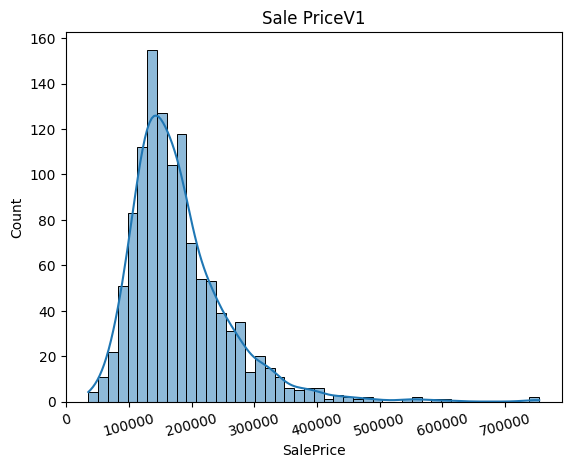

In [10]:
plt.title('Sale PriceV1')
plt.xticks(rotation=15)
sns.histplot(train['SalePrice'], kde=True)
plt.show()

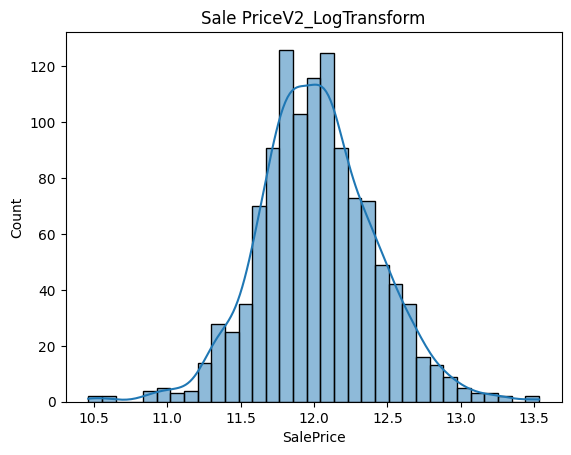

In [11]:
plt.title('Sale PriceV2_LogTransform')
log_SalePrice = np.log1p(train['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

<br>
<br>

#### 결측치 파악
- Null 컬럼이 무엇인지와 개수까지 한번에 조사
- 컬럼이 많기 때문에 내림차순으로 정리해서 -> 많은 순으로 빠르게 확인

In [12]:
# 결측치가 있는 컬럼 출력
isnull_series = train.isnull().sum()
isnull_df = pd.DataFrame(isnull_series[isnull_series > 0].sort_values(ascending=False), columns=['결측치'])
print('\n결측치가 있는 컬럼(개수까지):')
display(isnull_df)


결측치가 있는 컬럼(개수까지):


,결측치
PoolQC,1162
MiscFeature,1120
Alley,1098
Fence,941
MasVnrType,694
FireplaceQu,545
LotFrontage,218
GarageType,69
GarageYrBlt,69
GarageFinish,69


#### 결측치 처리 계획(초안)
- 1000개 이상 : PoolQC, MiscFeature, Alley

> 전체 데이터셋의 양을 생각했을 때 결측치가 1000개가 넘어가는 컬럼은 어찌되었든 결측치 자체가 너무 많기 때문에 대체를 하는 것 자체가 **이상치**를 불러일으킬 우려가 있으니 Drop을 하는 것이 좋을 것 같음.
  - `PoolQC`는 주택의 수영장에 대한 컬럼이고 수영장이 있는 주택이 많이 존재하지 않기 떄문에 결측치가 많은 것으로 판단
  - `MiscFeature`는 말그대로 주택에 딸린 부가적 공간에 대한 정보이고, 이 정보에 Null 값이 많다는 의미를 -> 부가 공간보다는 주 공간을 위주로 주택 가격을 예측하는 것이 맞다는 판단
  - `Alley`는 골목 접근 방식인데, 결측치가 많아 값의 반영이 어렵고, 주택 가격 예측에 큰 영향을 미친다고 보기 어려운 과도하게 지엽적인 컬럼으로 판단

- 100~999개 : Fence, MasVnrType, FireplaceQu, LotFrontage

> 컬럼이 뜻하는 의미에 따라서 조금 고민이 필요함
  -   - `Fence`는 울타리의 품질인데, 울타리의 유무가 아니기 때문에 주택 가격 예측에 심하게 영향을 미치지는 않을 것으로 판단 -> DROP
  - `MasVnrType`은 주택 외벽의 마감재 종류를 보여주는 컬럼인데, 특정한 마감재를 사용하는 경우 [가격이 일반적인 경우와 많이 달라지는 경우](https://www.creditkarma.com/home-loans/i/does-siding-increase-value)가 있어 드랍보다는 평균값으로 대체할 예정
  - `FireplaceQu`는 벽난로의 품질이고, 이 역시 유무가 아니기 때문에 드랍을 해도 문제가 되지 않을 것으로 예상
  - `LotFrontage`는 도로와 주택의 거리 즉, 접근성에 영향을 미치는 컬럼이기 때문에 인근 집의 평균값을 사용해 대체하는 것이 가장 좋아보임.

- 그 외 결측치 컬럼

> 특징적으로 Drop을 해주는 컬럼을 제외하고는 평균값으로 대체할 것(정규 분포에 가까운 형태를 위해)

#### 상관관계를 아예 고려하지 않을 수는 없겠지만, 컬럼이 뜻하는 의미에 중점을 두고 결측치를 처리하는 기준을 세웠음.

<br>
<br>

<br>
<br>

#### 상관관계 파악
  - 컬럼이 과도하게 많아 바로 파악하기 어렵기 때문에, 0.5 이상만 파악

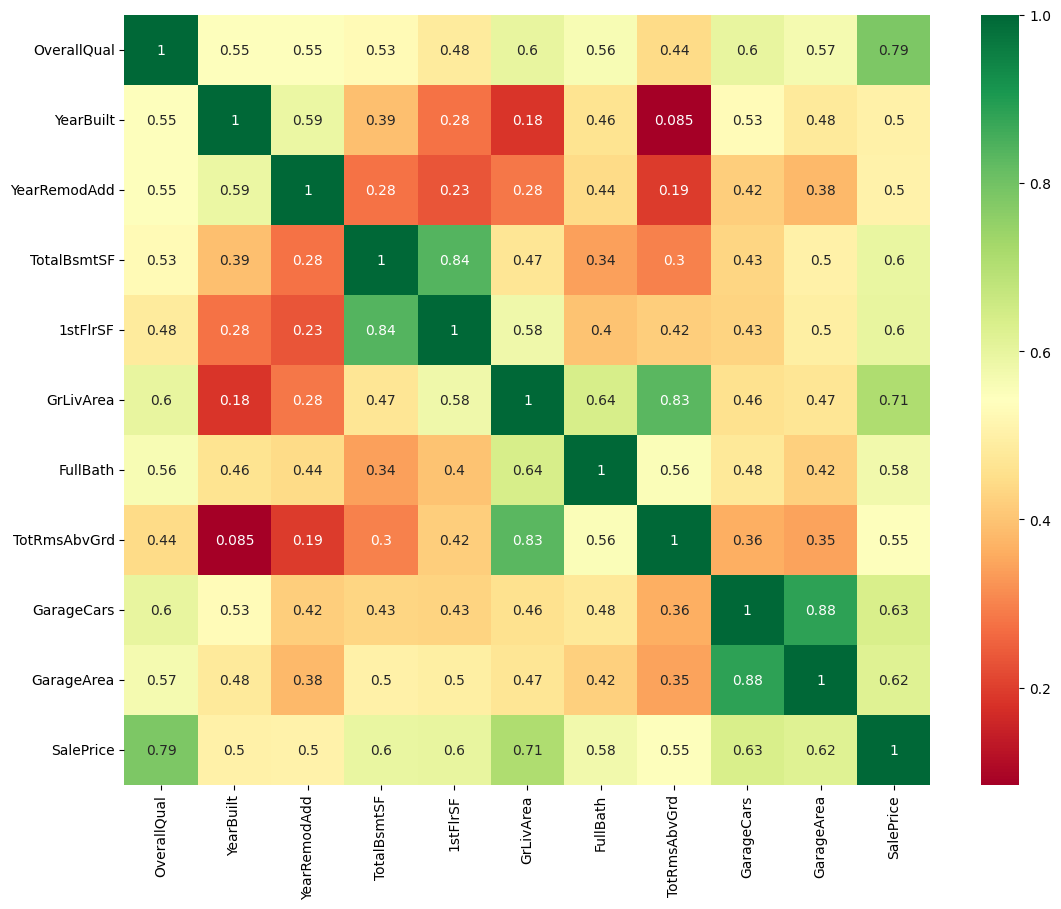

In [13]:
# 수치형 데이터만
numeric_columns = train.select_dtypes(include=['number']).columns
train_numeric = train[numeric_columns]

# 상관행렬 계산
corr_matrix = train_numeric.corr()
corr_columns = corr_matrix.index[abs(corr_matrix["SalePrice"])>= 0.5]
corr_columns

# 상관행렬 시각화
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(train[corr_columns].corr(),annot=True,cmap="RdYlGn")

- Target인 `SalePrice`와 상관관계가 높은 변수 상위 10개만
  - 상관관계 기준 : 0.5 이상
  - 0.5를 넘는 컬럼 자체가 10개만 있기 때문에 이만큼 본 것(20개를 봤을때 0.5를 넘지 않음)

> 결론 : 위의 결측치 파악 파트에서 고려했던 부분과 상관관계 수치 사이의 큰 연관성은 없기 때문에 결측치 처리 기준에 문제가 있지 않음으로 판단

In [14]:
numeric_columns = train.select_dtypes(include=['number']).columns
train_numeric = train[numeric_columns]

corr_matrix = train_numeric.corr()

# 'SalePrice'와 상관관계가 높은 변수들 선택 및 0.5 이상의 상관관계만 필터링
corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
high_corr = corr_saleprice[corr_saleprice >= 0.5]

high_corr_df = high_corr.reset_index()
high_corr_df.columns = ['Variable', 'Correlation with SalePrice']
print(high_corr_df)

        Variable  Correlation with SalePrice
0      SalePrice                    1.000000
1    OverallQual                    0.785111
2      GrLivArea                    0.710178
3     GarageCars                    0.632622
4     GarageArea                    0.618311
5       1stFlrSF                    0.597729
6    TotalBsmtSF                    0.595882
7       FullBath                    0.577860
8   TotRmsAbvGrd                    0.548795
9   YearRemodAdd                    0.504817
10     YearBuilt                    0.501762


### Target값 로그 변환

In [15]:
# 로그 변환
train['SalePrice'] = np.log1p(train['SalePrice'])
y = train.SalePrice

#### 결측치 처리
- 기존 진행 코드
  - 성능상 결측치를 대체하는 것이 크게 도움이 되지 않아 상위의 6개 컬럼은 모두 Drop 하는 것으로 수정
  - 또한 Drop하지 않는 컬럼도 평균값이 아닌 중앙값으로 다시 시도

In [ ]:
# # "결측치 파악" 파트 기준에 따라 결측치 Drop
# train.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

# # "결측치 파악" 파트 기준에 따라 결측치를 평균값으로 대체
# numeric_cols = train.select_dtypes(include=[np.number])
# train.fillna(numeric_cols.mean(), inplace=True)

# null_count = train.isnull().sum()[train.isnull().sum() > 0]
# print('결측치가 있는 컬럼의 데이터 타입:\n', train.dtypes[null_count.index])

- 적용 코드

In [16]:
# 결측치 보기
train_null = train.isnull().sum()
train_null = train_null[train_null > 0]

In [17]:
train_null.sort_values(ascending=False)

,0
PoolQC,1162
MiscFeature,1120
Alley,1098
Fence,941
MasVnrType,694
FireplaceQu,545
LotFrontage,218
GarageType,69
GarageYrBlt,69
GarageFinish,69


- 모델 적용을 위해서는 test 데이터도 결측치 처리가 필요

In [19]:
test_null = test.isnull().sum()
test_null = test_null[test_null > 0]
test_null.sort_values(ascending = False)

,0
PoolQC,291
MiscFeature,286
Alley,271
Fence,238
MasVnrType,178
FireplaceQu,145
LotFrontage,41
BsmtFinType1,14
BsmtFinType2,14
BsmtExposure,14


- 결측치 Drop

In [20]:
train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    950 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [22]:
test_id = test['Id']
test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    251 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

### object 데이터 처리

In [28]:
category_features = train.select_dtypes(include=['object']).columns
category_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
numeric_features = train.select_dtypes(exclude = ["object"]).columns
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

- Target인 SalePrice를 삭제

In [30]:
# train 데이터
numeric_features_ts = train.select_dtypes(exclude = ["object"]).columns
category_features_ts = train.select_dtypes(include = ["object"]).columns
numeric_features_ts = numeric_features_ts.drop("SalePrice")
print("숫자형 데이터 : " + str(len(numeric_features_ts)))
print("카테고리형 데이터 : " + str(len(category_features_ts)))

train_num = train[numeric_features_ts]
train_cat = train[category_features_ts]

숫자형 데이터 : 36
카테고리형 데이터 : 37


In [31]:
# test 데이터
numeric_features_ts = test.select_dtypes(exclude = ["object"]).columns
category_features_ts = test.select_dtypes(include = ["object"]).columns
print("숫자형 데이터 : " + str(len(numeric_features_ts)))
print("카테고리형 데이터 : " + str(len(category_features_ts)))

test_num = test[numeric_features_ts]
test_cat = test[category_features_ts]

숫자형 데이터 : 36
카테고리형 데이터 : 37


- 남은 결측치 데이터에 대한 처리
  - median()-> 평균값이 아닌 중앙값

In [32]:
# 이전
print("train 결측치 : " + str(train_num.isnull().values.sum()))
print("test 결측치 : " + str(test_num.isnull().values.sum()))

train 결측치 : 295
test 결측치 : 53


In [33]:
# 중앙값 처리
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(test_num.median())

print("train 결측치 : " + str(train_num.isnull().values.sum()))
print("test 결측치 : " + str(test_num.isnull().values.sum()))

train 결측치 : 0
test 결측치 : 0


#### 이상치 처리
- GrLivArea가 SalePrice와 양의 상관관계가 높음을 알 수 있는데, GrLivArea가 4000 이상인 값 중에서 2개의 값이 SalePrice가 낮은 이상치를 발견할 수 있음
  - 주거 공간이 크다면 -> 가격이 상승해야하는데 그렇지 않은 것

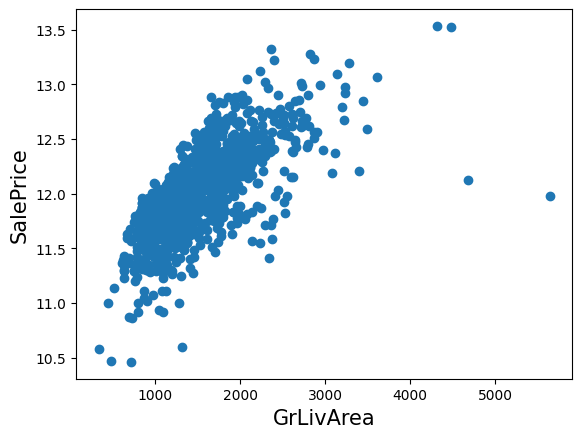

In [35]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

#### 데이터 왜곡 처리

In [39]:
from scipy.stats import skew

features = train_num.apply(lambda x: skew(x))
features.sort_values(ascending=False)

,0
MiscVal,22.099034
PoolArea,14.377604
LotArea,11.097791
3SsnPorch,11.040646
LowQualFinSF,9.608861
BsmtFinSF2,4.507199
KitchenAbvGr,4.488325
BsmtHalfBath,4.133732
ScreenPorch,3.976766
EnclosedPorch,3.093917


In [40]:
features_ts = test_num.apply(lambda x: skew(x))
features_ts.sort_values(ascending=False)

,0
PoolArea,17.000101
LotArea,11.678120
MiscVal,9.926571
3SsnPorch,7.427955
LowQualFinSF,7.324262
ScreenPorch,4.452703
KitchenAbvGr,4.416801
BsmtHalfBath,3.912540
BsmtFinSF2,3.487335
MasVnrArea,3.316226


- 0.5보다 큰 왜곡 수치를 가지는 경우의 피쳐를 만들어서 로그 변환

In [41]:
# train 데이터
skew_features = train[features.index]
skew_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [42]:
# test 데이터
skew_features_ts = test[features.index]
skew_features_ts.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [43]:
# 로그 변환
skew_features = np.log1p(skew_features)

In [44]:
skew_features_ts = np.log1p(skew_features_ts)

- 원-핫 인코딩 진행
  - 현재 데이터는 순서 없는 카테고리형 변수로 구성
  - 라벨 인코딩을 진행하게 되면, 모델이 순서 또는 관계를 의도와 다르게 학습할 우려가 있기 때문
> 원-핫 인코딩은 train 데이터와 test 데이터를 잠시 합쳐서 진행
- 현재 train 데이터는 1168개의 데이터, test 데이터는 292개의 데이터가 존재

In [45]:
integration_data = pd.concat([train_cat, test_cat], axis=0)
integration_data = pd.get_dummies(integration_data)
train_cat = integration_data[:len(train_cat)]
test_cat = integration_data[len(train_cat):]

In [48]:
print('아웃라이어 값:', str(train_cat.isnull().values.sum()))

아웃라이어 값: 0


In [49]:
print('아웃라이어 값:', str(test_cat.isnull().values.sum()))

아웃라이어 값: 0


- 수치형 데이터를 다시 합쳐서 train 데이터와 test 데이터로 넣어주기
  - 원-핫 인코딩 진행으로 컬럼이 정상적으로 늘어났으며 원래의 train 데이터와 test 데이터로 분리함

In [50]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

(1168, 266)

In [51]:
test = pd.concat([test_cat,test_num],axis=1)
test.shape

(292, 266)

#### 파생변수 적용
- 데이터 특징
  - 각 피쳐들의 합을 구할 수 있는 피쳐가 있음.
  - 예를 들어, TotalBsmtSF는 Total square feet of basement area를 뜻함.
  - 또한 1stFlrSF, 2ndFlrSF은 First, Second Floor square feet을 뜻하기 때문에 이 3가지 피쳐를 더한 컬럼을 만들면 -> SF의 총합을 구할 수 있는 방식

In [ ]:
train.columns.to_list()

In [ ]:
# # 파생변수 생성
# train['TotalSF'] = (train['TotalBsmtSF']
#                        + train['1stFlrSF']
#                        + train['2ndFlrSF'])

# train['YrBltAndRemod'] = train['YearBuilt'] + train['YearRemodAdd']

# train['Total_sqr_footage'] = (train['BsmtFinSF1']
#                                  + train['BsmtFinSF2']
#                                  + train['1stFlrSF']
#                                  + train['2ndFlrSF']
#                                 )


# train['Total_Bathrooms'] = (train['FullBath']
#                                + (0.5 * train['HalfBath'])
#                                + train['BsmtFullBath']
#                                + (0.5 * train['BsmtHalfBath'])
#                               )


# train['Total_porch_sf'] = (train['OpenPorchSF']
#                               + train['3SsnPorch']
#                               + train['EnclosedPorch']
#                               + train['ScreenPorch']
#                               + train['WoodDeckSF']
#                              )

- 이진화 진행
  - 특정 시설이 있는지 여부, 없는지 여부를 0과 1로 표현

In [ ]:
# house_df['haspool'] =house_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# house_df['has2ndfloor'] =house_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# house_df['hasgarage'] =house_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# house_df['hasbsmt'] =house_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# house_df['hasfireplace'] =house_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
train.columns.to_list()

- 파생변수 생성 및 이진화 이후, 모델 학습/예측/평가 진행 시 LinearRegression에서 크게 튀는 수치가 발생됨
![image](https://github.com/user-attachments/assets/40e7e957-b8ce-4ac3-9e3d-9aa50fa8cab2)

> 둘다 반영하지 않고 원본으로 모델에 넣는 것으로 결정

# 선형 회귀 모델의 학습/예측/평가
- 선형 회귀 모델은 다음의 3가지로 진행
  - LinearRegression
  - Ridge
  - Lasso

> 모델 선정 이유
- LinearRegression
  - 연속 수치 데이터가 많기 때문에 기본 선형 회귀 모델로 빠르게 수행해서 결과를 확인하고자 함
- Ridge
  - LinearRegression의 과적합 문제를 보완하고, 주택 가격 예측 데이터 자체가 컬럼이 많기 때문에 모델의 과도한 학습을 조금 막아보고자 실행
- Lasso
  - 릿지보다 더 극단적으로 데이터를 처리하기 때문에 불필요한 변수를 더 많이 제거한 형태로 모델 학습을 할 수 있고, 성능에도 좋은 영향을 미칠 가능성이 있기 때문에 선택

<Br>
<br>

- 훈련 데이터 지정
  - 코드 중복을 최소화하기 위해 공통 코드는 분리

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3,random_state= 0)

- CV 함수도 미리 지정

In [54]:
# folds 수치는 5
n_folds = 5

scorer = make_scorer(mean_squared_error,greater_is_better = False)

# train 데이터
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return rmse

# test 데이터
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return rmse

#### LinearRegression
- 선형 회귀의 경우, 큰 수치가 나오는 것으로 보아, 적합하지 않은 모델일 가능성이 높음

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print('train 데이터 RMSE: ',rmse_CV_train(lr).mean())
print('test 데이터 RMSE: ',rmse_CV_test(lr).mean())

y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)

train 데이터 RMSE 663.3986292530134
test 데이터 RMSE 364356.98376629467


<br>
<br>

#### Ridge
- 하이퍼 파라미터 튜닝을 통해 최적화된 파라미터 값을 먼저 찾고, alpha 값 가중치를 부여해서 확장 테스트를 해서 더 최적화된 alpha를 찾아내는 과정 진행

In [58]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('최적 alpha: ',alpha)
print('alpha 값을 확장하여 다시 값을 찾습니다! ...')

최적 alpha:  10.0
alpha 값을 확장하여 다시 값을 찾습니다! ...


In [59]:
# alpha 값 확장해보기
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65,
                          alpha * .7, alpha * .75,
                          alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95,
                          alpha, alpha * 1.05,
                          alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3,
                          alpha * 1.35, alpha * 1.4
                          ]
                ,cv = 5)

ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print("최종 최적 alpha :", alpha)
print("train 데이터 릿지 RMSE:", rmse_CV_train(ridge).mean())
print("test 데이터 릿지 RMSE:", rmse_CV_test(ridge).mean())

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

최종 최적 alpha : 10.0
train 데이터 릿지 RMSE: 0.1389695924441798
test 데이터 릿지 RMSE: 0.17219953250147124


In [ ]:
# # 모델의 복잡도를 낮출 수 있는 방법 중 하나를 시도(중요한 변수만 선택할 수 있도록 가공)-> ChatGPT 결과
# coef = pd.Series(ridge.coef_, index = X_train.columns)
# print("릿지 회귀를 통해" + str(sum(coef != 0)) + "개의 변수를 예측에 사용하며," +  str(sum(coef == 0)) + "개의 변수는 무시되었습니다.")

<br>
<br>

#### Lasso

In [62]:
from sklearn.linear_model import LassoCV

# 초기 alpha 값 설정
lasso = LassoCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print('초기 최적 alpha: ', alpha)
print('alpha 값을 확장하여 다시 값을 찾습니다! ...')

# alpha 값을 세밀하게 확장하여 최적 alpha 찾기
lasso = LassoCV(alphas=[alpha * 0.6, alpha * 0.65, alpha * 0.7, alpha * 0.75, alpha * 0.8,
                        alpha * 0.85, alpha * 0.9, alpha * 0.95, alpha, alpha * 1.05,
                        alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35,
                        alpha * 1.4], cv=5)

lasso.fit(X_train, y_train)
alpha = lasso.alpha_

print("최종 최적 alpha :", alpha)
print("train 데이터 라쏘 RMSE:", rmse_CV_train(lasso).mean())
print("test 데이터 라쏘 RMSE:", rmse_CV_test(lasso).mean())

# 예측값 계산
y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

초기 최적 alpha:  0.01
alpha 값을 확장하여 다시 값을 찾습니다! ...
최종 최적 alpha : 0.006
train 데이터 라쏘 RMSE: 0.15216878561980246
test 데이터 라쏘 RMSE: 0.19483706866353206


<br>
<br>

#### ++ ElasticNet

In [63]:
from sklearn.linear_model import ElasticNetCV

# 초기 alpha 및 l1_ratio 값 설정
elasticnet = ElasticNetCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],
                          l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
                          cv=5)
elasticnet.fit(X_train, y_train)
alpha = elasticnet.alpha_
l1_ratio = elasticnet.l1_ratio_
print('초기 최적 alpha: ', alpha)
print('초기 최적 l1_ratio: ', l1_ratio)
print('alpha와 l1_ratio 값을 확장하여 다시 찾습니다! ...')

# alpha 및 l1_ratio 값을 세밀하게 조정하여 최적 파라미터 찾기
elasticnet = ElasticNetCV(alphas=[alpha * 0.6, alpha * 0.65, alpha * 0.7, alpha * 0.75, alpha * 0.8,
                                  alpha * 0.85, alpha * 0.9, alpha * 0.95, alpha, alpha * 1.05,
                                  alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35,
                                  alpha * 1.4],
                          l1_ratio=[l1_ratio * 0.8, l1_ratio * 0.85, l1_ratio * 0.9, l1_ratio * 0.95,
                                    l1_ratio, l1_ratio * 1.05, l1_ratio * 1.1, l1_ratio * 1.15],
                          cv=5)

elasticnet.fit(X_train, y_train)
alpha = elasticnet.alpha_
l1_ratio = elasticnet.l1_ratio_

print("최종 최적 alpha :", alpha)
print("최종 최적 l1_ratio :", l1_ratio)
print("train 데이터 엘라스틱넷 RMSE:", rmse_CV_train(elasticnet).mean())
print("test 데이터 엘라스틱넷 RMSE:", rmse_CV_test(elasticnet).mean())

# 예측값 계산
y_train_elasticnet = elasticnet.predict(X_train)
y_test_elasticnet = elasticnet.predict(X_test)

초기 최적 alpha:  0.01
초기 최적 l1_ratio:  0.1
alpha와 l1_ratio 값을 확장하여 다시 찾습니다! ...
최종 최적 alpha : 0.006
최종 최적 l1_ratio : 0.08000000000000002
train 데이터 엘라스틱넷 RMSE: 0.13665578360763575
test 데이터 엘라스틱넷 RMSE: 0.1716728991929625


> 현재까지의 결과
- 추가로 진행한 엘라스틱넷 회귀가 가장 수치가 미세하게 좋으나, 최적 l1_ratio가 릿지에 가깝게 나왔기 때문에 릿지를 활용해도 비슷하게 나올 것으로 예측

<br>
<br>

# 회귀 트리 학습/예측/평가
- 가장 성능이 좋게 나올 가능성이 높은 3가지 모델 선정
- 다만, 트리 기반 모델의 경우 기본 소요 시간이 긴 편에 속하기 때문에 하이퍼 파라미터 최적화를 자동화하지 않고대신 일부 수치를 변경해가며 넣는 방식으로 해결!
  - XGBoost
  - LightGBM
  - RandomForest

> 모델 선정 이유
- XGBoost
  - 특성이 많은 데이터셋의 경우 유리함
  - 결측치 처리를 이미 하기는 했으나, 자동 결측치 처리를 지원하기 때문에 활용하면 성능에 좋은 영향을 보일 것 같음
- LightGBM
  - 데이터셋 자체가 많은 파생 변수를 포함하고 있는 고차원 데이터로 파악되기 때문에 이런 경우에 유리할 수 있기 때문
- RandomForest
  - 데이터의 복합적이고 복잡한 관계 안에서 데이터 학습에 유리할 수 있기 때문
  - 또한, 카테고리형 및 수치형 데이터를 처리했다고 하더라도 둘 다 다룰 수 있는 모델이기 때문에 처리에 유리

<br>
<br>

#### XGBoost

In [64]:
from xgboost import XGBRegressor

# XGBoost 모델 생성 및 학습
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)
xgb_model.fit(X_train, y_train)

# Train 및 Test 데이터에 대한 RMSE 계산
print('Train 데이터 RMSE:', rmse_CV_train(xgb_model).mean())
print('Test 데이터 RMSE:', rmse_CV_test(xgb_model).mean())

# 예측 수행
y_train_xgb = xgb_model.predict(X_train)
y_test_xgb = xgb_model.predict(X_test)

Train 데이터 RMSE: 0.15261135454563432
Test 데이터 RMSE: 0.15814899558578216


#### LightGBM

In [66]:
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

# LightGBM 모델 생성 및 학습
lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0, verbose=-1)
lgbm_model.fit(X_train, y_train)

# Train 및 Test 데이터에 대한 RMSE 계산
print('Train 데이터 RMSE:', rmse_CV_train(lgbm_model).mean())
print('Test 데이터 RMSE:', rmse_CV_test(lgbm_model).mean())

# 예측 수행
y_train_lgbm = lgbm_model.predict(X_train)
y_test_lgbm = lgbm_model.predict(X_test)


Train 데이터 RMSE: 0.15024631915153583
Test 데이터 RMSE: 0.16245388115273976


#### RandomForest

In [67]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)\

rf.fit(X_train,y_train)
print('train 데이터 RMSE',rmse_CV_train(rf).mean())
print('test 데이터 RMSE',rmse_CV_test(rf).mean())
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

train 데이터 RMSE 0.15827967300947496
test 데이터 RMSE 0.1619176240465599


# 선형 회귀 모델 & 회귀 트리 모델 통합 결과 확인

- LinearRegression 제외 모두 비슷한 수치를 보임.
  - 스태킹 앙상블로 상위 3개의 모델을 합쳐 결과 확인
  - 상위 3개의 모델을 같은 비율로 합쳐 결과 확인(평균 앙상블)

In [73]:
# RMSE 종합
print('[선형 회귀 모델]\n')
print('LinearRegression')
print('train 데이터 RMSE: ',rmse_CV_train(lr).mean())
print('test 데이터 RMSE: ',rmse_CV_test(lr).mean())
print('\n')
print('Ridge')
print("train 데이터 릿지 RMSE:", rmse_CV_train(ridge).mean())
print("test 데이터 릿지 RMSE:", rmse_CV_test(ridge).mean())
print('\n')
print('Lasso')
print("train 데이터 라쏘 RMSE:", rmse_CV_train(lasso).mean())
print("test 데이터 라쏘 RMSE:", rmse_CV_test(lasso).mean())



print('[회귀 트리 모델]\n')
print('XGBoost')
print('Train 데이터 RMSE:', rmse_CV_train(xgb_model).mean())
print('Test 데이터 RMSE:', rmse_CV_test(xgb_model).mean())
print('\n')
print('LightGBM')
print('Train 데이터 RMSE:', rmse_CV_train(lgbm_model).mean())
print('Test 데이터 RMSE:', rmse_CV_test(lgbm_model).mean())
print('\n')
print('RandomForest')
print('train 데이터 RMSE',rmse_CV_train(rf).mean())
print('test 데이터 RMSE',rmse_CV_test(rf).mean())

[선형 회귀 모델]

LinearRegression
train 데이터 RMSE:  663.3986292530134
test 데이터 RMSE:  364356.98376629467


Ridge
train 데이터 릿지 RMSE: 0.1389695924441798
test 데이터 릿지 RMSE: 0.17219953250147124


Lasso
train 데이터 라쏘 RMSE: 0.15216878561980246
test 데이터 라쏘 RMSE: 0.19483706866353206
[회귀 트리 모델]

XGBoost
Train 데이터 RMSE: 0.15261135454563432
Test 데이터 RMSE: 0.15814899558578216


LightGBM
Train 데이터 RMSE: 0.15024631915153583
Test 데이터 RMSE: 0.16245388115273976


RandomForest
train 데이터 RMSE 0.15827967300947496
test 데이터 RMSE 0.1619176240465599


<br>
<br>

# 스태킹 앙상블 진행
- 최종 메타 모델은 릿지로 진행

In [74]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# XGBoost, LightGBM, Ridge 모델을 준비
from xgboost import XGBRegressor
import lightgbm as lgb

# 모델 정의
xgb_model = XGBRegressor()
lgb_model = lgb.LGBMRegressor()
ridge_model = Ridge()

# 스태킹 모델 정의
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('ridge', ridge_model)],
    final_estimator=Ridge()
)

# 모델 학습
stacking_model.fit(X_train, y_train)

# 예측
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# RMSE 계산 함수
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# RMSE 출력
print("Train 데이터 RMSE: ", rmse(y_train, y_train_pred))
print("Test 데이터 RMSE: ", rmse(y_test, y_test_pred))

Train 데이터 RMSE:  0.0629058825850712
Test 데이터 RMSE:  0.14491598983079423


<br>
<br>

# 평균 앙상블

In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

# 각 모델 학습
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# 각 모델의 예측 결과
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# 예측 결과 평균내기
y_pred_avg = (y_pred_xgb + y_pred_lgb + y_pred_ridge) / 3

# RMSE 계산
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# RMSE 출력
print("Train 데이터 RMSE (평균 앙상블):", rmse(y_train, (xgb_model.predict(X_train) + lgb_model.predict(X_train) + ridge_model.predict(X_train)) / 3))
print("Test 데이터 RMSE (평균 앙상블):", rmse(y_test, y_pred_avg))

Train 데이터 RMSE (평균 앙상블): 0.04338266194890963
Test 데이터 RMSE (평균 앙상블): 0.13763233093541755


---

<br>

### 🐶 샘플 길이 맞추기
- 다르게 나온 원인?
```python
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
```
- 여기에서 학습 데이터를 `test`가 아닌 X_test로 잘못 기입!
(이러면 안되지....너무한 실수인데 이거..몇시간이..하하..)

In [95]:
# # 데이터를 나누고 모델을 학습
# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

# # 각 모델 학습
# xgb_model = XGBRegressor()
# xgb_model.fit(X_train, y_train)

# lgb_model = lgb.LGBMRegressor()
# lgb_model.fit(X_train, y_train)

# ridge_model = Ridge()
# ridge_model.fit(X_train, y_train)

# # 각 모델 예측
# y_pred_xgb = xgb_model.predict(X_test)
# y_pred_lgb = lgb_model.predict(X_test)
# y_pred_ridge = ridge_model.predict(X_test)

# # 예측 결과 평균내기
# y_pred_avg = (y_pred_xgb + y_pred_lgb + y_pred_ridge) / 3

# # RMSE 계산 함수
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# # RMSE 출력
# print("Train 데이터 RMSE (평균 앙상블):", rmse(y_train, (xgb_model.predict(X_train) + lgb_model.predict(X_train) + ridge_model.predict(X_train)) / 3))
# print("Test 데이터 RMSE (평균 앙상블):", rmse(y_test, y_pred_avg))

Train 데이터 RMSE (평균 앙상블): 0.044819303993029545
Test 데이터 RMSE (평균 앙상블): 0.12040103232878699


In [99]:
# # 평균 앙상블
# y_pred_xgb = xgb_model.predict(test)
# y_pred_lgb = lgb_model.predict(test)
# y_pred_ridge = ridge_model.predict(test)

# pred = (y_pred_xgb + y_pred_lgb + y_pred_ridge)/3
# pred.shape

(292,)

In [100]:
# submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/sample_submission.csv")
# submission.shape

(292, 2)

In [101]:
# if 'SalePrice' in submission.columns:
#   del submission['SalePrice']
# submission = pd.DataFrame({
#     'Id': test_id,
#     'SalePrice': np.expm1(pred)
#     })
# submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/submission2.csv', index=False)


---

# 스택 앙상블, 평균 앙상블로 submission을 한 결과
- 생각한 수치보다 좋지 않아서, 별도 코드를 재사용하며 일일이 모델을 찾음..
- 시간이 더 주어지지 않아, 확인한 경우의 수 중 릿지, 라쏘, 랜덤 포레스트 3가지가 가장 수치가 좋아 이를 이용해 최종 학습 진행!

In [88]:
# # 평균 앙상블
# y_pred_xgb = xgb_model.predict(test)
# y_pred_lgb = lgb_model.predict(test)
# y_pred_ridge = ridge_model.predict(test)

# pred = (y_pred_xgb + y_pred_lgb + y_pred_ridge)/3
# pred.shape

pred_ridge = ridge.predict(test)
pred_lasso = lasso.predict(test)
pred_rf = rf.predict(test)

pred = (pred_ridge + pred_lasso + pred_rf)/3
pred.shape

(292,)

# 최종 submission

---

- colab ver

In [89]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/sample_submission.csv")
submission.shape

(292, 2)

In [90]:
if 'SalePrice' in submission.columns:
  del submission['SalePrice']
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': np.expm1(pred)
    })
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Module4:머신러닝 활용 다양한 데이터 다루기/1115프로젝트/ex/data/submission.csv', index=False)


In [91]:
submission.head()

,Id,SalePrice
0,86,265659.848186
1,227,265772.500714
2,492,146135.474919
3,64,132803.918561
4,576,113257.936271


---

---

- Kaggle 제출

In [ ]:
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv")
submission.shape

In [ ]:
if 'SalePrice' in submission.columns:
  del submission['SalePrice']
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': np.expm1(pred)
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

---

# 회고
우선, 이번 프로젝트를 진행하며 최대한 초반 EDA 과정에서 데이터 전처리를 효과적으로 모두 처리하기 위해 시간을 많이 할애했습니다.
<br>
그때그때 값을 보면서 전처리를 조금씩 더 진행해도 되지만, 그렇게 되다보면 모델 학습을 하는 파트에서 데이터 가공을 어떻게 했는지에 대한 과정별로 하나하나 학습/예측/평가를 해야만 하고 결국 실행 시간이 비효율적으로 늘어나는 문제가 있다고 판단했습니다.
<br>

그래서 최대한 EDA를 완벽하게 마치려고 왔다갔다 코드를 옮기면서 진행하느라 정말 헷갈렸던 것 같습니다.
<br>

전체적으로 그동안 배웠던 내용들을 바탕으로 처리를 했는데 이상치의 경우에는 이번에는 무작정 IQR을 사용하는 대신 데이터 왜곡을 처리하는 방식으로 제거해나갔습니다.
<br>
또 새로운 방식을 배우게 되어서 정말 흥미로웠어요!
<br>
다만, 아쉬웠던 점은 결측치 처리에 있어 결측치를 삭제하고 대체하는 것에 근거가 다소 설명에 그쳤다는 점입니다. 미루어 짐작하는 것에 더 가까웠다고 볼 수 있겠죠.
<br>
<br>
조금 더 수치를 이용한 근거가 있었다면 데이터의 이상치를 만들어내지 않으면서도 모델 성능에 도움이 되는 방향으로 결측치를 처리할 수 있었을 것 같아 아쉽습니다.
<br>
매 프로젝트마다 느끼는 부분이지만 항상 EDA 파트가 가장 제 발목을 잡는 것 같아요.
<br>
<br>
가장 신중해야한다고 생각하기 때문에 더더욱 결정이 어렵고 시간도 많이 쏟는데 늘..예상한 것보다 수치는 잘 안나오는 그런 무한의 굴레에 빠지곤 합니다.
<br>
<br>
그래도 더 많은 데이터들을 접하고 계속해서 훈련을 하다보면 지금보다는 더 나은 판단을 할 수 있을 것이라 기대하기도 합니다.
<br>
<br>
어쨌든 시간이 더 주어진다면, 차라리 결측치를 모두 삭제한 뒤의 성능, 일부 삭제한 모든 경우의 수를 하나씩 구현한 뒤의 성능을 제각각 비교할 수 있을테니 아마도 아주 오랜 시간이 소요되더라도 성능 개선에는 분명 도움이 될 것 같아요.
<br>
<br>
회귀 트리 모델 학습 파트에서도 늘 랜덤 포레스트의 소요 시간이 걱정되면서도 놓지 못하고 있습니다.
<br>
시간은 엄청나게 소요되더라도 높은 확률로 좋은 성능을 보이는 부분 때문인 듯합니다.
<br>
그래서인지 매번 프로젝트 진행 시마다 돌렸던 코드를 이렇게 지우거나 주석처리를 하게 되네요..
<br>
모델 선정에 있어서 조금은 한정적이라는 느낌을 받기도 했으나 오래 걸리는 문제를 결정의 우선순위에서 제외할 수 있다면 대부분의 경우에 더 좋은 성능을 내는 모델을 찾아내고 그렇게 애정이 생긴 모델을 계속해서 괴롭히면서(ㅎㅎ) 프로젝트를 앞으로도 해나갈 것 같습니다.
<br>
<br>

아, 그리고 한가지 더 아쉬웠던 부분은..!
마지막 결과를 낼 때 스태킹 앙상블과 평균 앙상블 모두 생각보다 좋은 성능을 내지 못했다는 점입니다.
그래서 시간이 허락하는만큼 모델들을 섞어봤고, 그중에서 가장 괜찮은 성능을 낸 경우를 submission으로 내는 선택을 했어요.
너무 아쉬워요...너무너무..
<br>
<br>
늘 결과물이 아쉽고, 또 아쉽지만..! 다음이 있기에 계속 공부하면서 현재의 프로젝트에 적용할 방안들을 계속 연구하면서 열심히 남은 프로젝트들도 공부들도 해나가고 싶습니다.
<br>
결과와는 별개로 이 공부를 시작할 때와 지금을 정말 비교할 수 없을 정도로 많은 부분을 배웠고 활용하고 있는 모습에 조금은 안도감이 느껴지기도 합니다.
<br>
동시에 내가 이걸 일로 할 수 있을까?라는 생각도 조금은 들지만요.
이번 프로젝트도 잘은 아니지만 열심히 했습니다!
<br>
개선점들을 더 찾아내서 성능을 올려보고 싶어요🥺
